In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('Dummy_data.csv')

In [3]:
X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
''''# Balancing the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))'''

"'# Balancing the data\nfrom collections import Counter\nfrom imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')\nX_resampled, y_resampled = ros.fit_resample(X_train, y_train)\nprint(sorted(Counter(y_resampled).items()))"

In [7]:
clf = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 30, max_depth = 8)
clf.fit(X_train, y_train)

C:\Users\krist\AppData\Local\Temp/ipykernel_28736/2193241801.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=30)

In [8]:
score = clf.score(X_test, y_test)
print(score)

prediction_test = clf.predict(X_test)

0.7950780880265026


In [9]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

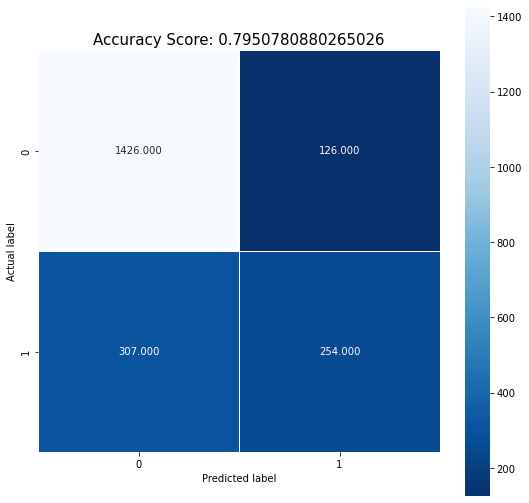

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [11]:
# Feature importance

feature_importances = pd.DataFrame(clf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances


ValueError: Shape of passed values is (3, 1), indices imply (26, 1)

In [ ]:
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(classification_report(y_test,prediction_test))

In [ ]:
print(score)

In [ ]:
# k-fold cross validation evaluation of xgboost model

from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))